In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing

# Basic notions of kNN (k-Nearest Neighbours)

The k-Nearest Neighbours is a classification algorithm based on Euclidian Distance. It receives data coordinates (values) from an unseen instance in the problem domain, and calculates the Euclidian Distance between this unseen instance's data point and the nearest, already labeled, data points. The assigned label to this unseen data is merely the most popular label between these chosen nearest data points.

The number of considered nearest labeled data points is not fixed, but instead is a parameter "k" set by the user. Hence the name k-Nearest Neighbours.

# OSEMN Pipeline for ML and Data Science

O - Obtaining data

S - Scrubbing data

E - Exploring data

M - Modeling data

N - INterpreting data

## Obtaining Data

In [2]:
# Source: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

df = pd.read_csv('./breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Information about the dataframe: column names, data types, null value counts, etc

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Scrubbing Data

In [4]:
# 'id' column won't help us predict our diagnosis, so we'll drop that.

df.drop('id', axis=1, inplace=True)

In [5]:
# Let's replace 'B' and 'M' with 0 and 1

df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})

Apart from the 'id' column, all other columns in the dataset may be useful.

There aren't any NaN values and all columns conveniently hold numerical values, so we wont't need any encoding.

## Exploring Data

diagnosis
0    357
1    212
Name: count, dtype: int64


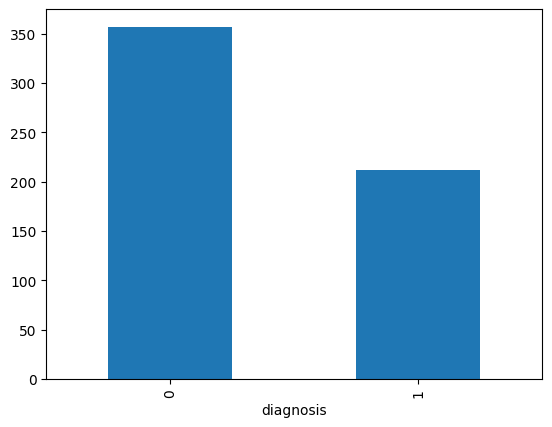

In [6]:
# Checking label/class distribution

print(df['diagnosis'].value_counts())
p = df['diagnosis'].value_counts().plot(kind="bar")

Remember, 0 is "Benign" and 1 is "Malignant"

Most instances of the dataset are of Benign cancer.

In this dataset, "Benign" outnumber "Maglignant" at a rate of approximately 1,68 : 1

In [7]:
# Basic statistical analysis

# count ---> number of NoN-empty rows in a feature.
# mean ---> mean value of that feature.
# std ---> Standard Deviation Value of that feature.
# min ---> minimum value of that feature.
# 25%, 50%, and 75% ---> percentile/quartile of each features. This quartile information helps us detect Outliers.
# max ---> maximum value of that feature.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


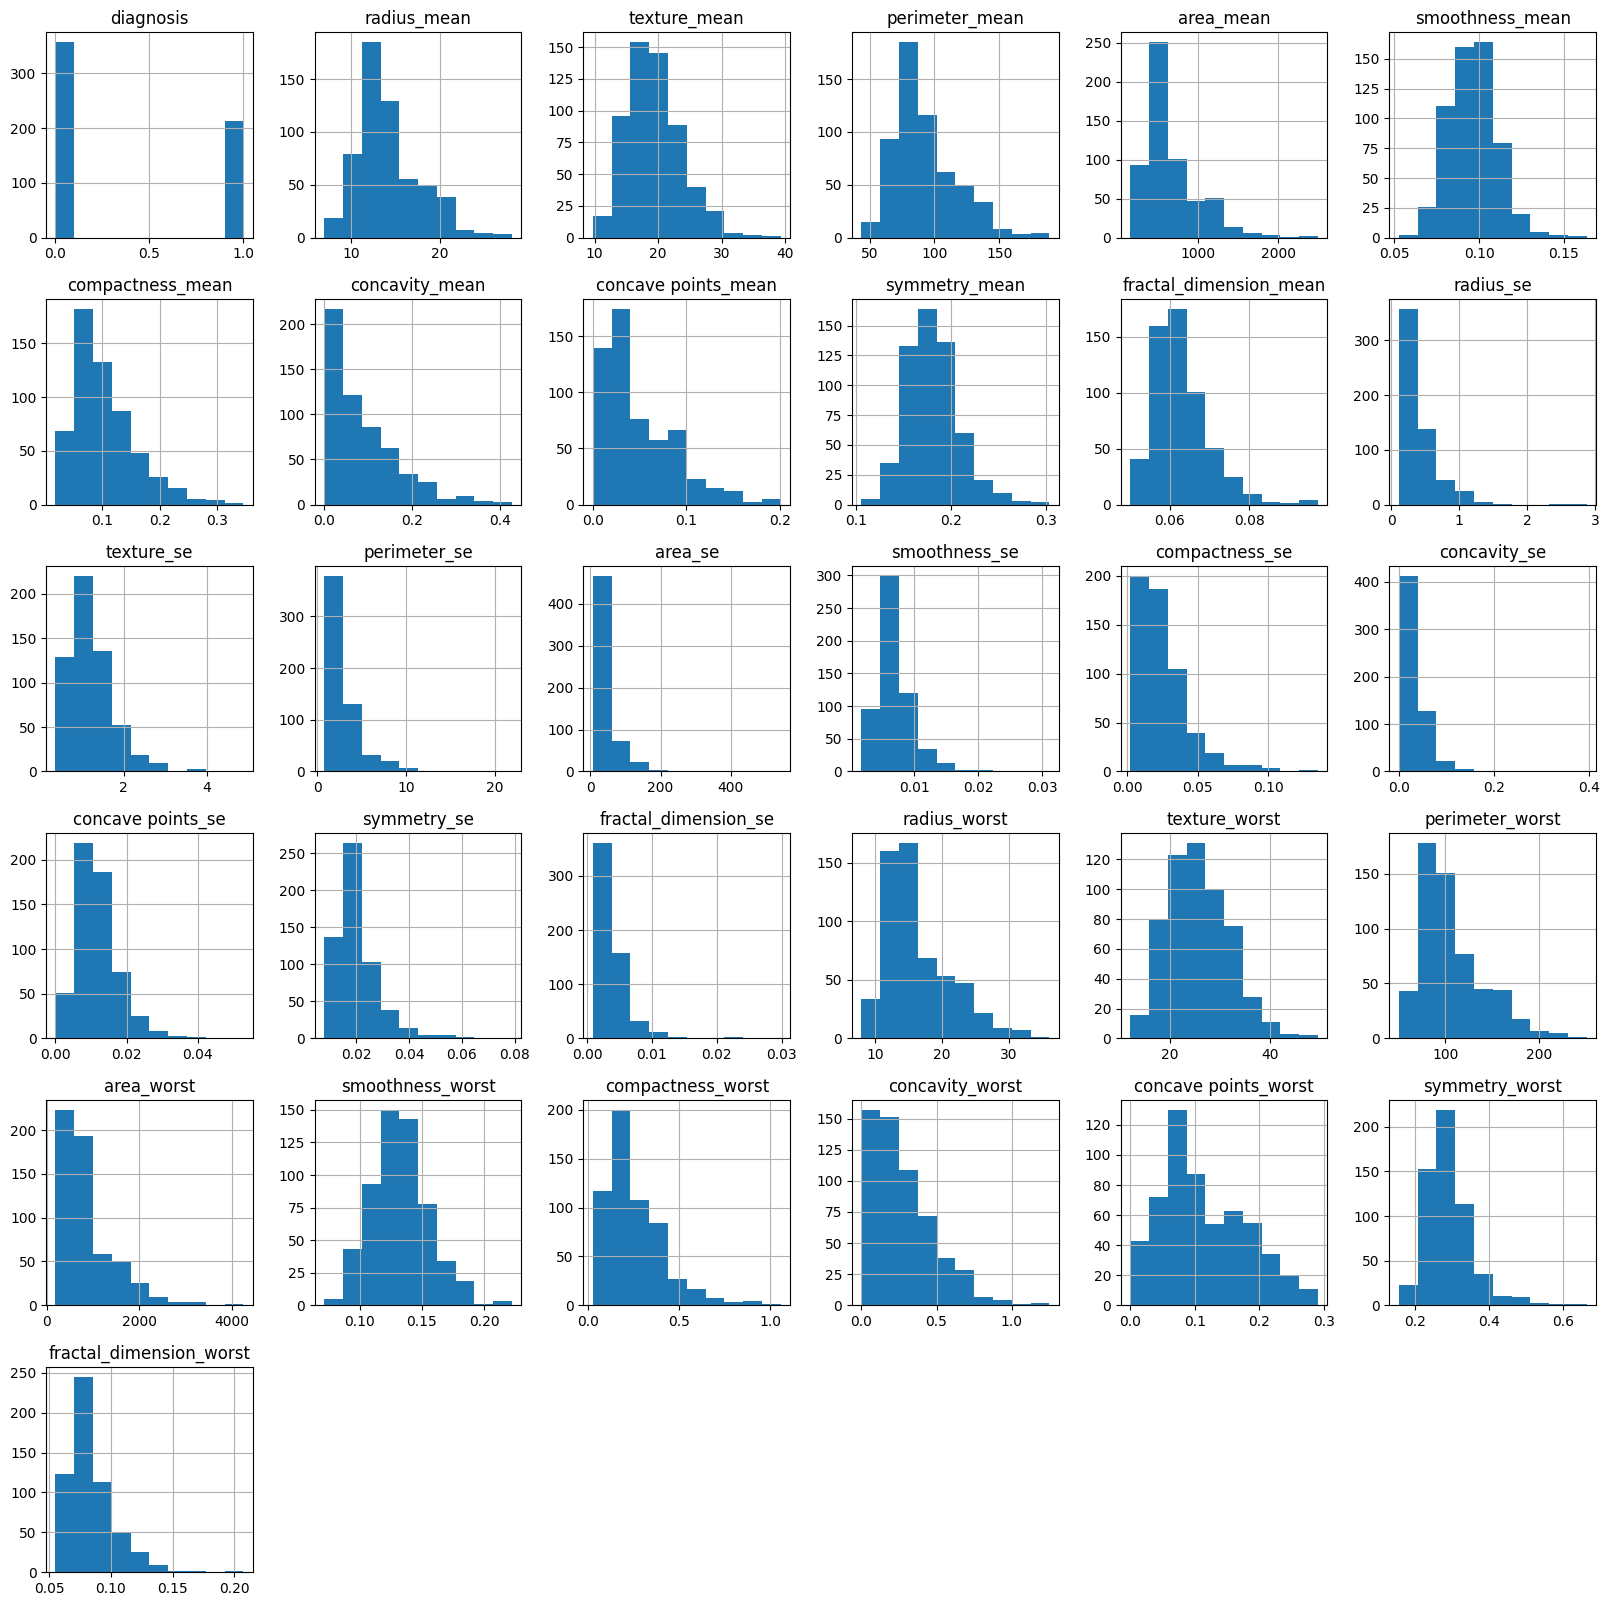

In [8]:
# Histogram for each feature

p = df.hist(figsize = (20,20))

Sometimes, when analysing a feature, the "0" value shouldn't be possible, and instead indicates the value in that instance is missing. Some datasets make this design choice, instead of inputing a "null" value. So we have to keep an eye on that when the minimum value of a column is "0".

In this case, a cell's "concavity" and "concave points" are characteristics that can present the value 0. So it's not a problem for this dataset.

## Modeling Data

### Train-test split

There are certain problems to be aware of before splitting our data into train and test sets.

We want to make sure neither train or test sets gets an unrepresentative amount of the labels. For example, it can lead our model to "learn too little" about one class in the training set, and then getting tested with many more cases in the test set.

To guarantee our split will be representative of the label distribution, we use the parameter 'stratify=y' in the method train_test_split().

In [9]:
from sklearn.model_selection import train_test_split

# Separating the dataframe feature columns (X) and target column (y)
feature_columns = df.columns.tolist()
feature_columns.remove('diagnosis')

X = df[feature_columns]
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30/100, stratify=y)

### Normalize the data

kNN is a distance based algorithm, that means it's sensible to data scale. And as we saw in df.describe().T, not all our features have the same scale (tip: they never do).

So, it is highly advisable to normalize our features **before** training with kNN.

It's also important to not use training data to normalize test data. That would mean we aren't simply scaling the test data, but instead also transforming it with information attained from the training data. We call this **data leakage**.

For normalizing, we'll use sklearn's StandardScaler:
- .fit_transform(X_train): uses X_train to adjust the scaler's internal attributes (like "mean" and a "variance") to X_train and returns a normalized version of X_train
- .transform(X_test): returns a normalized version of X_test, with the attributes previously adjusted by X_train

In [10]:
# Transforming y_train and y_test from column-vectors (n_samples,1) to 1D-arrays (n_samples,)
# sklearn's KNeighborsClassifier whines if we don't do it
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Normalizing train and test features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Representation of k-fold Cross Validation:

from IPython.display import Image
Image(url="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png")

### Training phase

First, for simplicity reasons we'll train our model and get it's accuracy for just k = 4. After that we'll be trying different k numbers to check which one works best for this problem.

In [12]:
# Training model
from sklearn.neighbors import KNeighborsClassifier
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

# Predicting
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [13]:
# Evaluating the model
from sklearn.metrics import f1_score

print("Test set Accuracy (F1-Score): ", f1_score(y_test, yhat))

Test set Accuracy (F1-Score):  0.905982905982906


In binary classification, metrics.accuracy_score is equal to the jaccard_score function.

### Testing different 'k' values

In [14]:
Ks = 60
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    # Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    
    # Get accuracies
    mean_acc[n-1] = f1_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.928     , 0.88695652, 0.93333333, 0.90598291, 0.94214876,
       0.92436975, 0.94214876, 0.91525424, 0.94214876, 0.92436975,
       0.93333333, 0.91525424, 0.91525424, 0.91525424, 0.91525424,
       0.91525424, 0.91525424, 0.90598291, 0.91525424, 0.90598291,
       0.91525424, 0.90598291, 0.90598291, 0.89655172, 0.90598291,
       0.89655172, 0.89655172, 0.89655172, 0.89655172, 0.89655172,
       0.89655172, 0.89655172, 0.89655172, 0.89655172, 0.89655172,
       0.89655172, 0.89655172, 0.89655172, 0.89655172, 0.89655172,
       0.89655172, 0.89655172, 0.89655172, 0.89655172, 0.89655172,
       0.88695652, 0.88695652, 0.87719298, 0.88695652, 0.87719298,
       0.87719298, 0.87719298, 0.87719298, 0.86725664, 0.87719298,
       0.86725664, 0.87719298, 0.86725664, 0.87719298])

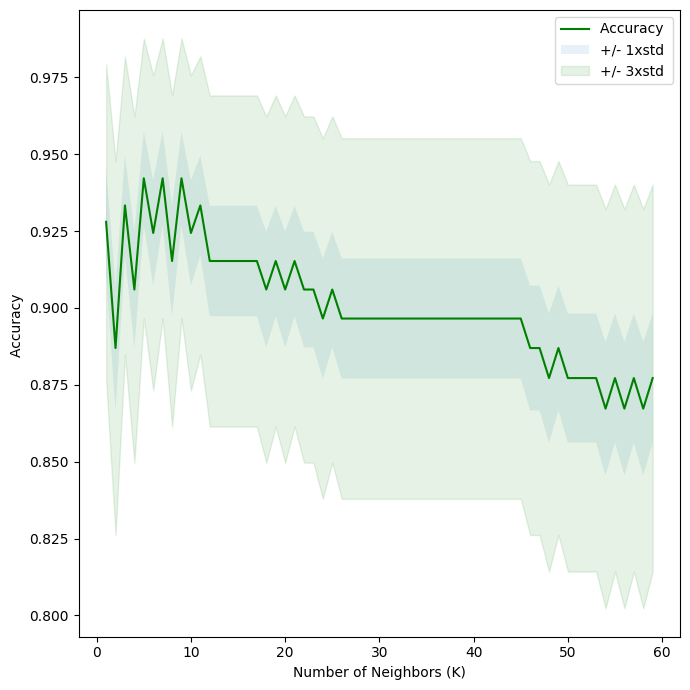

In [15]:
plt.figure(figsize=(7,7))
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [16]:
best_k = mean_acc.argmax()+1
print( "The best accuracy was with", mean_acc.max(), "with k=", best_k) 

The best accuracy was with 0.9421487603305785 with k= 5


### Validating

Another thing to keep in mind is that not all training sets have the same 'suitability' for training our model.

Different training sets in the same dataset can present a larger data diversity than others, or have less data noise than others. Thus, a good practice is to test our model against different train/test splits, and evaluating how it fares in all of them in average. That should give us a more solid idea of how accurate the model is against new real-world unseen data.

This technique is known as k-fold Cross Validation.

Also, keep in mind we still want to stratify the data (maintain the proportion of labels seen in the whole dataset) every time we split it into new train and test sets. That's why we'll be using sklearn's StratifiedKFold class.

In [17]:
from sklearn.model_selection import StratifiedKFold

# Defining how many times we'll split our data in different sets
skf = StratifiedKFold(n_splits=5)

# Initializing list of scores
f1_scores = []

# sklearn's StratifiedKFold().split() expects arrays as parameters, but currently,
# X and y are pandas' dataframes, so we'll need to transform them
X_array = X.to_numpy()
y_array = y.to_numpy()

# skf.split(X,y) returns indexes we can use to split our data in X_train, X_test, y_train, y_test
for train_index, test_index in skf.split(X_array, y_array):
    
    # Using indexes to split data
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]
    
    # Training model with the previously found best value of k for this dataset
    neigh = KNeighborsClassifier(n_neighbors=best_k).fit(X_train, y_train)
    
    # Predicting
    yhat = neigh.predict(X_test)

    # Evaluating via F1-score
    f1 = f1_score(y_test, yhat)
    f1_scores.append(f1)

# Calculating the average of F1-scores
avg_f1_score = sum(f1_scores) / len(f1_scores)
print("Average F1-Score: ", avg_f1_score)

Average F1-Score:  0.899260028970476
